# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Carregando os Dados

In [12]:
# Carrega o dataset
df = pd.read_csv('dados/dataset.csv')

In [14]:
# Shape
df.shape

(9700, 11)

In [19]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [20]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [17]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [55]:
filtro = df[df.Categoria == 'Office Supplies']
filtro2 = filtro[['Cidade','Valor_Venda']].groupby(['Cidade']).max()
filtro2['Valor_Venda'].idxmax()


'Detroit'

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

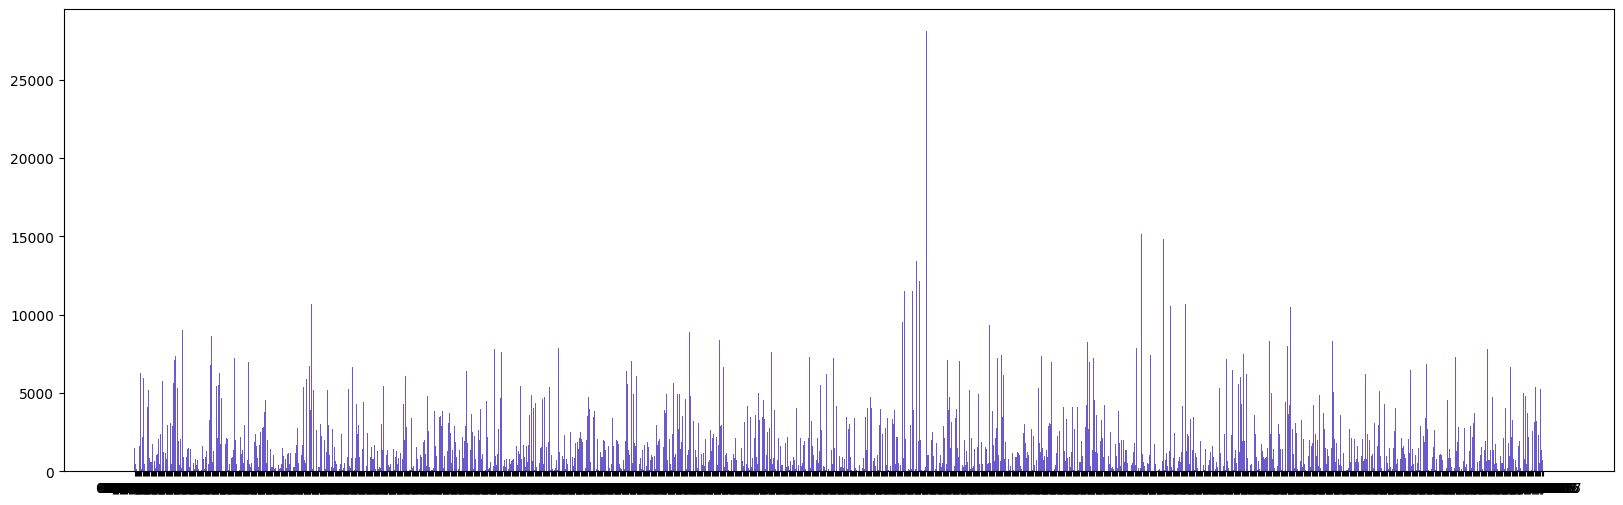

In [74]:
filtro = df[['Data_Pedido', 'Valor_Venda']].groupby(['Data_Pedido']).sum().reset_index()

plt.figure(figsize=(20,6))
plt.bar(filtro['Data_Pedido'], filtro['Valor_Venda'], color='#6A5ACD')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

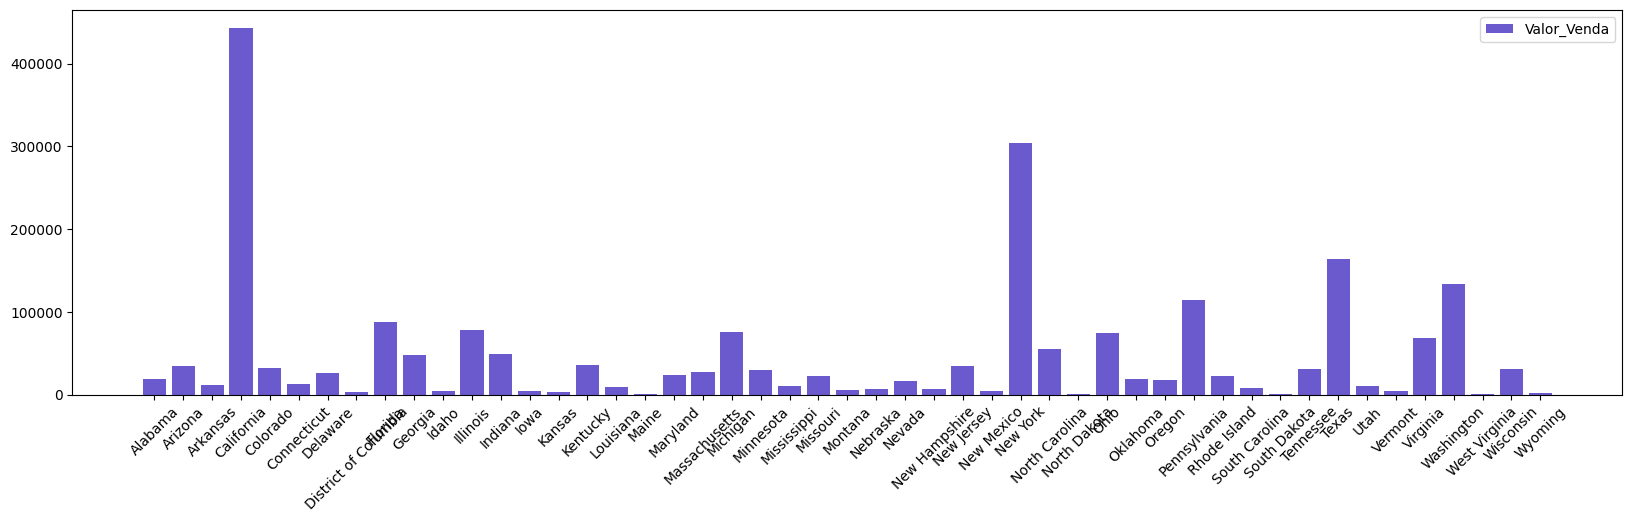

In [80]:
filtro = df[['Estado', 'Valor_Venda']].groupby(['Estado']).sum().reset_index()
filtro

plt.figure(figsize=(20,5))
plt.bar(filtro['Estado'], filtro['Valor_Venda'], color='#6A5ACD', label='Valor_Venda')
plt.xticks(rotation =45)
plt.legend()
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

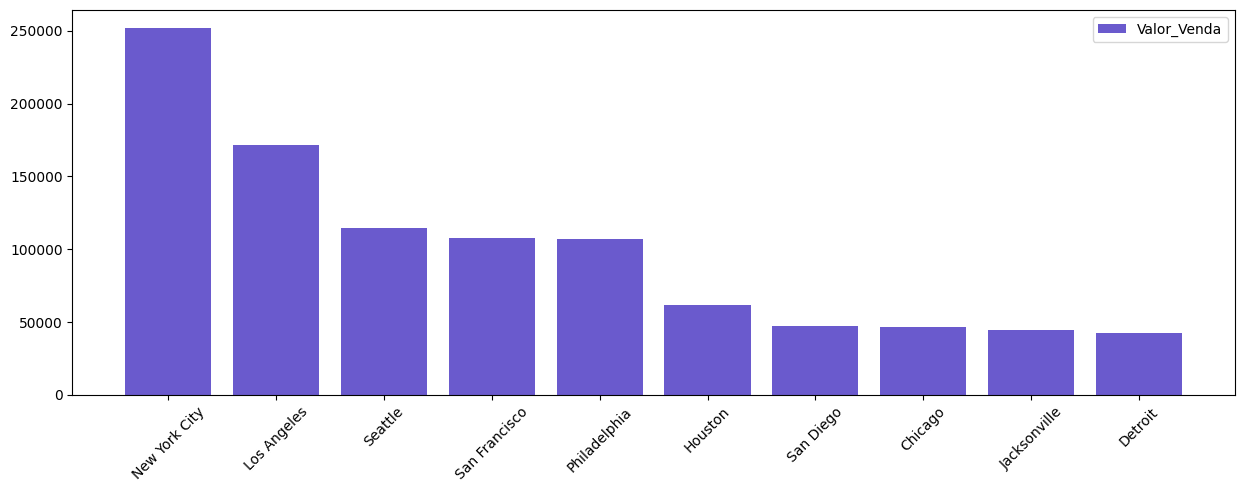

In [91]:
filtro = df[['Cidade','Valor_Venda']].groupby(['Cidade']).sum().reset_index()
maior = filtro.sort_values(by = 'Valor_Venda', ascending = False)
total = maior.head(10)

plt.figure(figsize=(15,5))
plt.bar(total['Cidade'], total['Valor_Venda'], color='#6A5ACD', label='Valor_Venda')
plt.xticks(rotation =45)
plt.legend()
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

([<matplotlib.patches.Wedge at 0x1cd4b873400>,
 [Text(-0.6878758713927032, -0.8583861517730406, 'Consumer'),
  Text(1.0503791375417673, 0.32665527305863784, 'Corporate'),
  Text(-0.3028751080654977, 1.0574812853730855, 'Home Office')],
 [Text(-0.3752050207596563, -0.4682106282398403, '50.7%'),
  Text(0.5729340750227822, 0.1781756034865297, '30.4%'),
  Text(-0.16520460439936238, 0.5768079738398648, '18.9%')])

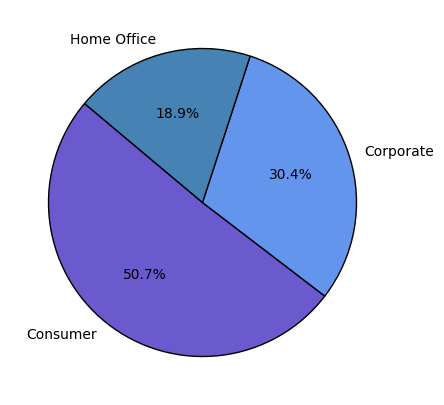

In [79]:
total = df[['Segmento','Valor_Venda']].groupby(['Segmento']).sum()

# Criar gráfico de pizza
plt.figure(figsize=(5, 5))  # Ajusta o tamanho do gráfico
plt.pie(
    total['Valor_Venda'],  # Valores numéricos para o gráfico
    labels=total.index,    # Rótulos (Segmentos)
    autopct='%1.1f%%',     # Exibe porcentagens no gráfico
    colors=['#6A5ACD', '#6495ED', '#4682B4', '#4169E1'],  # Cores personalizadas
    startangle=140,        # Ângulo inicial para melhor visualização
    wedgeprops={'edgecolor': 'black'}  # Adiciona bordas para melhor contraste
)

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [86]:
df['Ano'] = df['Data_Pedido'].str.split('/').str[2]
total = df[['Segmento', 'Ano','Valor_Venda']].groupby(['Segmento', 'Ano']).sum()
total

Valor_Venda
Segmento    Ano              
Consumer    2015  256719.9166
            2016  265295.2593
            2017  288459.5572
            2018  323359.6019
Corporate   2015  125819.5957
            2016  114643.1229
            2017  203266.7398
            2018  235502.7284
Home Office 2015   88229.0878
            2016   74134.1332
            2017  103639.6270
            2018  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [93]:
df[(df.Valor_Venda > 1000)].count()

ID_Pedido       457
Data_Pedido     457
ID_Cliente      457
Segmento        457
Pais            457
Cidade          457
Estado          457
ID_Produto      457
Categoria       457
SubCategoria    457
Valor_Venda     457
Ano             457
dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [115]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - df['Desconto'] * df['Valor_Venda']
a = df.loc[df['Desconto'] == 0.15, 'Valor_Venda'].mean()
b = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto'].mean()
print(" Média das vendas antes do desconto de 15%: $", round(a,2))
print(" Média das vendas depois do desconto de 15%: $", round(b,2))

 Média das vendas antes do desconto de 15%: $ 2116.81
 Média das vendas depois do desconto de 15%: $ 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

                      Valor_Venda
Ano  Mês Segmento                
2015 01  Consumer      146.736787
         Corporate     130.886769
         Home Office   329.855882
     02  Consumer      117.327926
         Corporate      69.235333
...                           ...
2018 11  Corporate     341.215278
         Home Office   247.519423
     12  Consumer      183.616244
         Corporate     153.167403
         Home Office   224.523983

[144 rows x 1 columns]


<Figure size 1200x600 with 0 Axes>

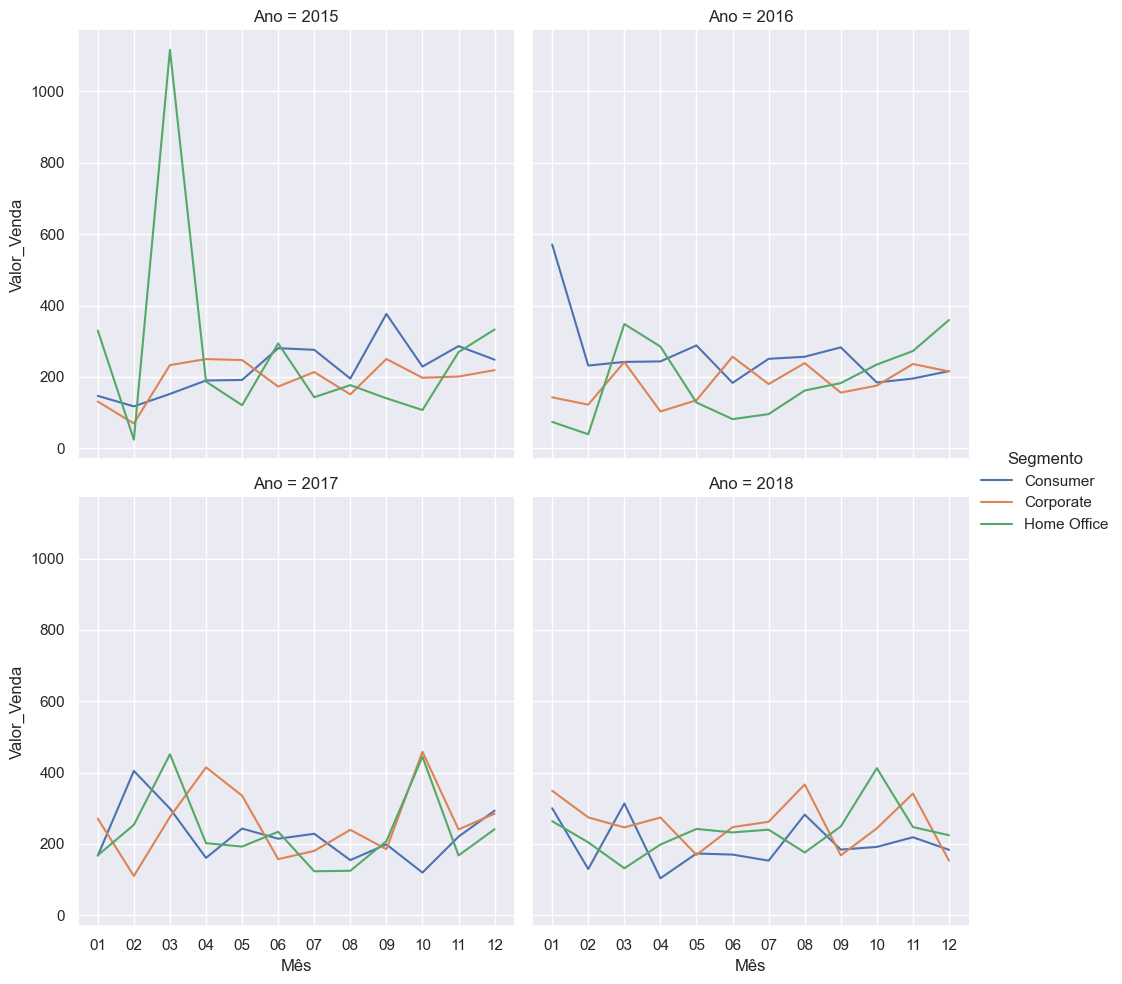

In [140]:
df['Mês'] = df['Data_Pedido'].str.split('/').str[1]
df = df.sort_values(by = 'Data_Pedido')
total = df[['Segmento', 'Ano','Mês','Valor_Venda']].groupby(['Ano','Mês','Segmento']).mean()
print(total)

anos = total.index.get_level_values(0)
meses = total.index.get_level_values(1)
segmentos = total.index.get_level_values(2)

plt.figure(figsize = (12,6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = total,
                   y = 'Valor_Venda',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 2
)

plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [158]:
# Ver quais são as top 12 subcategorias
sub_12 = df[['SubCategoria', 'Categoria','Valor_Venda']].groupby(['Categoria','SubCategoria']).sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(12)
sub_12[['Valor_Venda']] = sub_12[['Valor_Venda']].astype(int)
sub_12 = sub_12.sort_values(by = 'Categoria').reset_index(drop = True)

print(sub_12)


          Categoria SubCategoria  Valor_Venda
0         Furniture       Chairs       317919
1         Furniture       Tables       202083
2         Furniture    Bookcases       108045
3         Furniture  Furnishings        88862
4   Office Supplies      Storage       216188
5   Office Supplies      Binders       194723
6   Office Supplies   Appliances       104061
7   Office Supplies        Paper        76312
8        Technology       Phones       325271
9        Technology     Machines       189238
10       Technology  Accessories       162791
11       Technology      Copiers       146248


In [160]:
sub_12_cat = sub_12.groupby('Categoria').sum(numeric_only = True).reset_index()
sub_12_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [164]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [165]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

In [168]:
# Função para converter os dados em valor absoluto
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

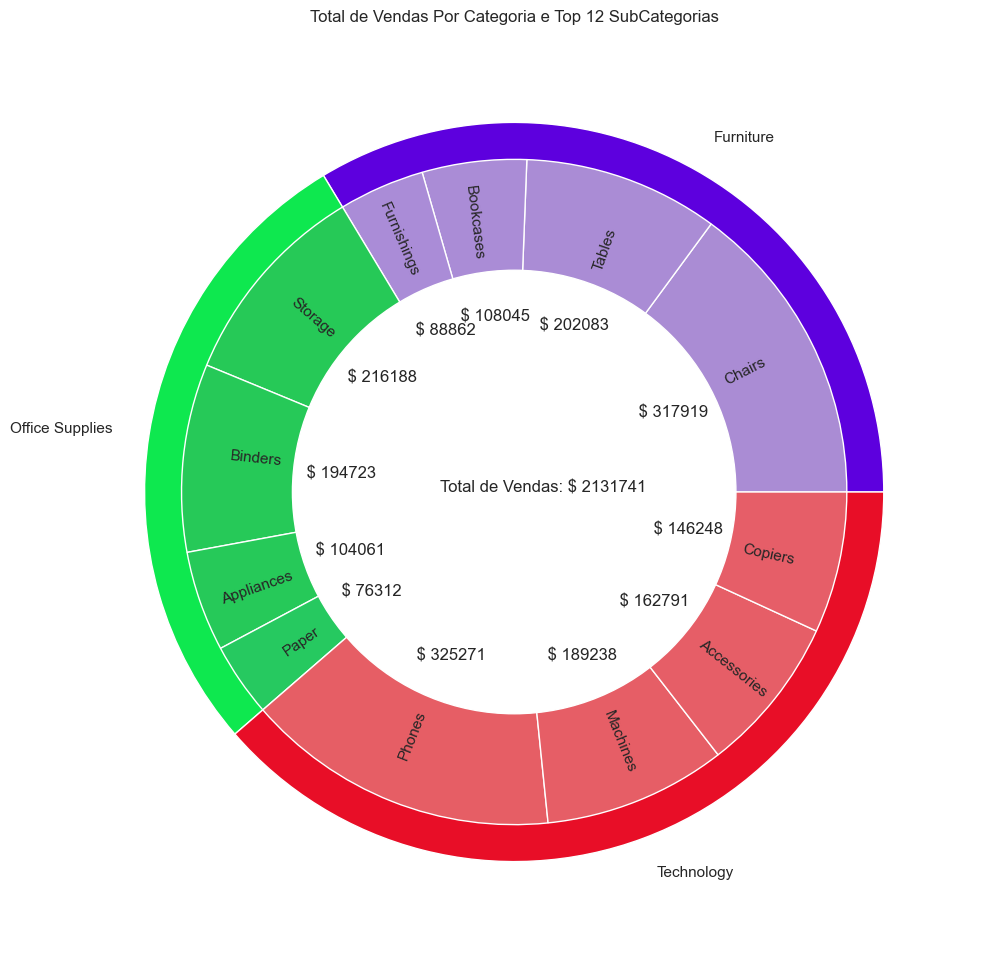

In [172]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(sub_12_cat['Valor_Venda'], 
            radius = 1,
            labels = sub_12_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(sub_12['Valor_Venda'],
            radius = 0.9,
            labels = sub_12['SubCategoria'],
            autopct = autopct_format(sub_12['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(sub_12['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim

In [177]:
[x**2 for x in range(1,11)]

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]